In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 加载FASHION_MNIST数据集
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
# 划分验证集
from sklearn.model_selection import train_test_split
x_train_scaled, x_valid_scaled, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print("训练集大小:", x_train_scaled.shape, y_train.shape)
print("验证集大小:", x_valid_scaled.shape, y_valid.shape)

训练集大小: (54000, 28, 28) (54000,)
验证集大小: (6000, 28, 28) (6000,)


In [6]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_valid_scaled = scaler.transform(x_valid_scaled.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

In [7]:
#构建CNN模型
model = tf.keras.models.Sequential([
    #卷积层，6个滤波器，尺寸为5×5，
    keras.layers.Conv2D(filters = 6,kernel_size=5,activation='sigmoid',input_shape=(28,28,1),padding='same'),
    #最大池化层，窗口大小2×2，移动步长为2
    keras.layers.MaxPool2D(pool_size = 2,strides = 2),
    keras.layers.Conv2D(filters = 16,kernel_size=5,activation='sigmoid',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size = 2,strides = 2),
    #扁平化层，将之前卷积层和池化层输出的多维特征图展开成一个一维向量，为全连接层的输入做准备
    keras.layers.Flatten(),
    #这是一个全连接层，包含120个神经元。
    keras.layers.Dense(120,activation = 'sigmoid'),
    #这是一个全连接层，包含84个神经元。
    keras.layers.Dense(84,activation = 'sigmoid'),
    #这是输出层，包含10个神经元
    keras.layers.Dense(10,activation = 'sigmoid'),
])

In [8]:
#设置回调函数
logdir = 'D:/cnn3'#定义了一个文件路径 logdir，用于存储日志和模型文件
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir,"output_model.h5")#创建一个指向输出模型文件的路径
callbacks=[#创建列表，包含3个不同的回调函数
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),#在每个训练周期结束时保存模型
    keras.callbacks.EarlyStopping(patience = 5,min_delta = 1e-3),
    #监视模型的指标，如果经过 patience 个训练周期（这里是5个周期）模型性能没有提升超过 min_delta （这里是0.001），则停止训练。这可以避免过拟合，节省训练时间。
    keras.callbacks.TensorBoard(log_dir=logdir)
    #将训练过程中的日志信息保存到指定的 logdir 路径中
]

In [9]:
#编译模型，使用交叉熵作为损失函数，随机梯度下降（SGD）作为优化器，准确率作为评估指标。
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.9),metrics=['accuracy'])
#指定了优化器，用于更新模型的权重以减小损失函数的值。在这里，使用了随机梯度下降（SGD）优化器，学习率设置为0.9。

In [10]:
#训练模型，使用训练数据训练模型，进行10个epochs的训练，使用256批量大小。
history=model.fit(x_train_scaled,y_train,epochs=10,batch_size=256,callbacks=callbacks,validation_data=(x_valid_scaled,y_valid))

Epoch 1/10
211/211 [==============================] - 25s 110ms/step - loss: 1.7318 - accuracy: 0.3366 - val_loss: 0.9802 - val_accuracy: 0.6270
Epoch 2/10


C:\Users\HUAWEI\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 23s 107ms/step - loss: 0.7902 - accuracy: 0.6934 - val_loss: 0.7877 - val_accuracy: 0.7058
Epoch 3/10
211/211 [==============================] - 23s 108ms/step - loss: 0.6379 - accuracy: 0.7486 - val_loss: 0.5702 - val_accuracy: 0.7780
Epoch 4/10
211/211 [==============================] - 23s 108ms/step - loss: 0.5554 - accuracy: 0.7830 - val_loss: 0.5275 - val_accuracy: 0.7990
Epoch 5/10
211/211 [==============================] - 23s 108ms/step - loss: 0.4986 - accuracy: 0.8091 - val_loss: 0.5109 - val_accuracy: 0.8025
Epoch 6/10
211/211 [==============================] - 23s 107ms/step - loss: 0.4584 - accuracy: 0.8306 - val_loss: 0.4471 - val_accuracy: 0.8387
Epoch 7/10
211/211 [==============================] - 23s 107ms/step - loss: 0.4217 - accuracy: 0.8455 - val_loss: 0.4058 - val_accuracy: 0.8483
Epoch 8/10
211/211 [==============================] - 23s 107ms/step - loss: 0.4030 - accuracy: 0.8524 - val_loss: 0.4067 - val_accuracy: 0.8

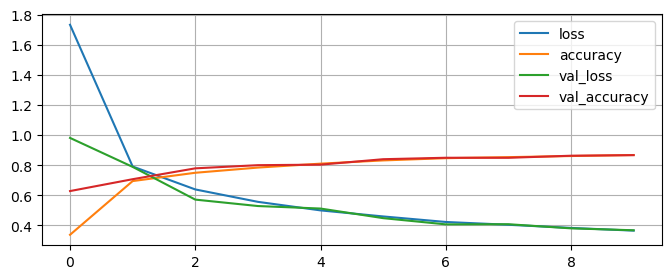

In [11]:
#绘制学习曲线，这个函数用于绘制训练过程中的损失和准确率的变化情况，以便进行可视化分析
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,3))
    plt.grid(True)
    plt.show()
plot_learning_curves(history)